## Horizon Constraints

This notebook will demonstrate how the horizon line works.

A `Horizon` accepts a list of `obstruction_points` as well as a `default_horizon` (with 30° as default). The `obstruction_points` is a list of at least two tuples where each tuple is an alt/az coordinate.  The idea is that you are defining a list of obstructions that will be interpolated between the given points. Thus, you have a "start" point and an "end" point (given in alt/az) for each obstruction. You can have as many obstructions as you want and obstructions can also contain "middle" points. See examples below for more details.

The `Horizon` class automatically builds a `horizon_line` that is a list with 360 elements where each index of the list corresponds to an azimuth degree (0-360) and the value corresponds to the minimum allowed altitude for that azimuth.

An example `obstruction_point` list might be (see below for plot of this example):
```
[
    [[40, 30], [40, 75]],   # From azimuth 30° to 75° there is an 
                            # obstruction that is at 40° altitude 
    [[50, 180], [40, 200]], # From azimuth 180° to 200° there is 
                            # an obstruction that slopes from 50° 
                            # to 40° altitude
]
```

In [1]:
# Basic imports for plotting
import matplotlib
matplotlib.use('Agg')

from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np

In [2]:
# Load config and horizon class
from panoptes.utils.config.helpers import load_config
from panoptes.utils.horizon import Horizon

In [23]:
# Get the default horizon
config = load_config("/var/panoptes/POCS/conf_files/pocs.yaml")
default_horizon = config['location']['horizon']
default_horizon

<Quantity 35. deg>

 # Helper function to plot - accepts `Horizon.horizon_line`
def plot_horizon(hline):
    az = np.arange(len(hline))

    fig, ax = plt.subplots(1)
    fig.set_figwidth(12)

    ax.plot(az, hline, '-')

    ax.set_xlim(0, 360)
    ax.set_xlabel('Azimuth / deg')
    ax.set_ylim(0, 90)
    ax.set_ylabel('Altitude / deg')
    
    ax.fill_between(az, 0, hline, alpha=0.2)

    plt.title('Horizon line')
    plt.show()

In [4]:
def plot_horizon(hline):
    az = np.arange(len(hline))
    
    fig, ax = plt.subplots(1)
    fig.set_figwidth(12)
    
    ax.plot(az, hline, '-')
    
    ax.set_xlim(0, 360)
    ax.set_xlabel('Azimuth / deg')
    ax.set_ylim(0, 90)
    ax.set_ylabel('Altitude / deg')
    
    ax.fill_between(az, 0, hline, alpha=0.2)
    
    plt.title('Horizon line')
    plt.show()

### Horizon Examples

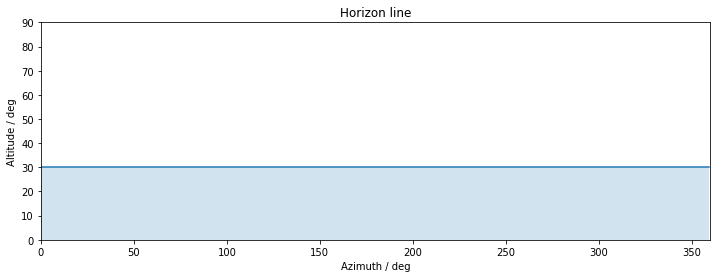

In [5]:
# Basic example
h1 = Horizon()
plot_horizon(h1.horizon_line)

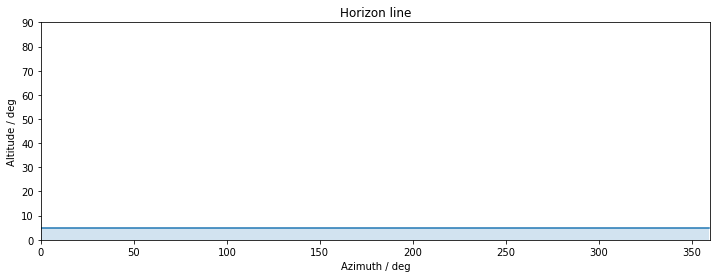

In [6]:
# Lower default horizon
h2 = Horizon(default_horizon=5)
plot_horizon(h2.horizon_line)

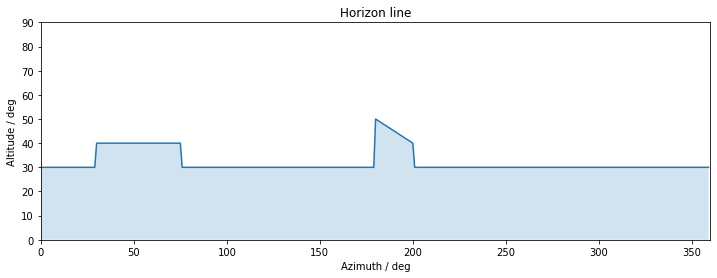

In [7]:
# Intro example
points = [
    [[40, 30], [40, 75]],  
    [[50, 180], [40, 200]]
]
h3 = Horizon(points)
plot_horizon(h3.horizon_line)

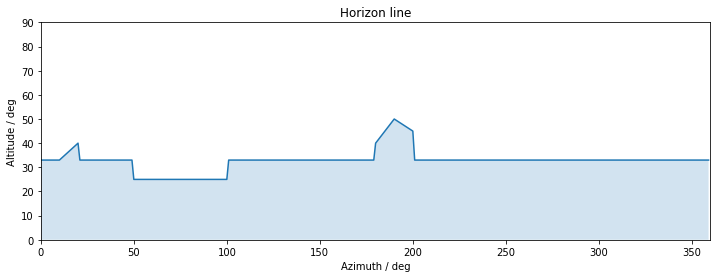

In [8]:
# Example with three points
points = [
    [[25.0, 50.0], [25.0, 100.0]],               # Below default horizon
    [[40.0, 180.0], [50.0, 190.0], [45., 200.]], # Three points
    [[33.0, 10.0], [40.0, 20.0]],    
]
h4 = Horizon(points, default_horizon=33)
plot_horizon(h4.horizon_line)

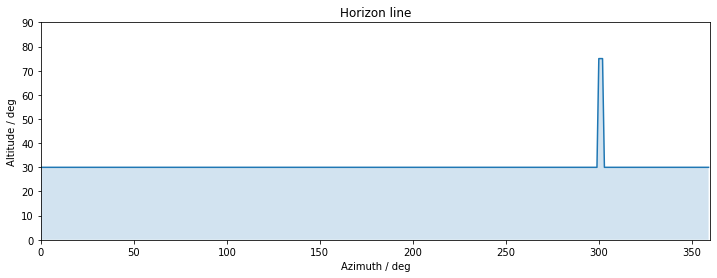

In [9]:
# Radio tower
points = [
    [[75.0, 300.0], [75.0, 302.0]],
]
plot_horizon(Horizon(points).horizon_line)

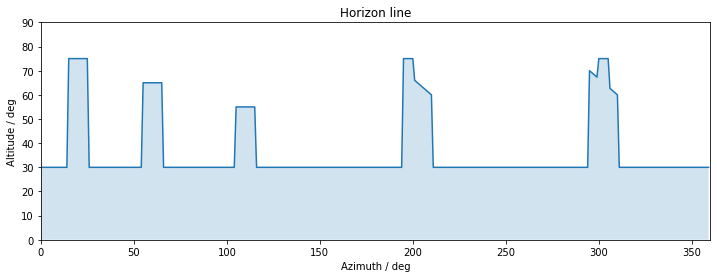

In [10]:
# Funky buildings; overlapping azimuths, negative azimuths; out of order
points = [
    [[75.0, 300.0], [75.0, 305.0]], # Far right overlapping
    [[70.0, 295.0], [60.0, 310.0]],
    
    [[75.0, -165.0], [75.0, -160.0]], # Middle funky
    [[70.0, -165.0], [60.0, -150.0]],    
    
    [[75.0, 15.0], [75.0, 25.0]],   # Left side 1
    [[65.0, 55.0], [65.0, 65.0]],   # Left side 2 
    [[55.0, 105.0], [55.0, 115.0]], # Left side 3   
]
plot_horizon(Horizon(points).horizon_line)

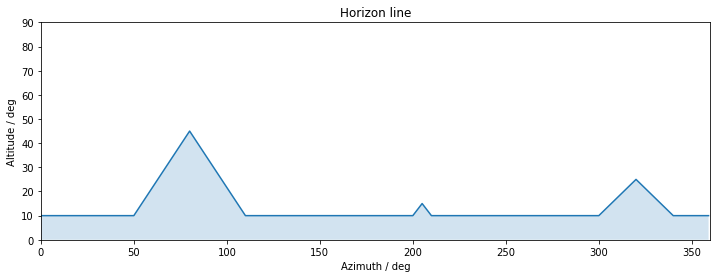

In [11]:
# Pyramids! Note order of obstruction points doesn't matter
points = [
    [[10.0, 50.0], [45., 80.], [10.0, 110.0]], # Big
    [[10.0, 300.0], [25., 320.], [10.0, 340.0]], # Medium
    [[10.0, 200.0], [15., 205.], [10.0, 210.0]], # Tiny
]
plot_horizon(Horizon(points, default_horizon=10).horizon_line)

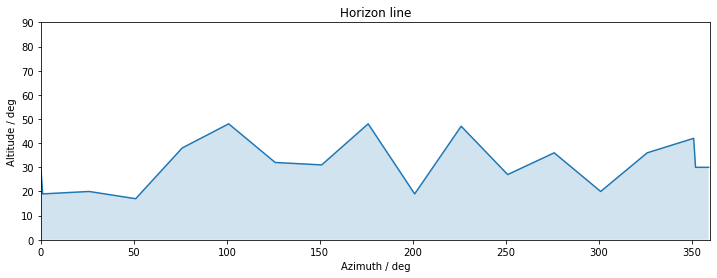

In [12]:
# Random horizon
import random
range_length = 360
points = [list(list(a) for a in zip(
        [random.randrange(15, 50) for _ in range(range_length)], # Random height
        np.arange(1, range_length, 25) # Set azimuth
    ))]
plot_horizon(Horizon(points).horizon_line)

### Scheduler example

The horizon is used in the `Altitude` constraint. Note that at this point it is just checking the altitude at the start of the observation (I think). This definitely needs some work and some testing but the mechanisms are in place.

In [26]:
from panoptes.pocs.core import POCS
from panoptes.pocs.observatory import Observatory

from panoptes.pocs.scheduler import create_scheduler_from_config

from panoptes.pocs.utils.logger import get_logger, LOGGER_INFO
logger = get_logger()
logger.enable('panoptes')

scheduler = create_scheduler_from_config()

2020-06-16 16:55:22.034 | DEBUG    | panoptes.utils.config.client:get_config:71 - Received config {"check_file":true,"fields_file":"simple.yaml","type":"dispatch"}

2020-06-16 16:55:22.041 | DEBUG    | panoptes.utils.config.client:get_config:73 - Parsing config results
2020-06-16 16:55:22.052 | INFO     | panoptes.utils.config.client:get_config:82 - Config key=scheduler: config_entry={'check_file': True, 'fields_file': 'simple.yaml', 'type': 'dispatch'}
2020-06-16 16:55:22.058 | INFO     | panoptes.pocs.scheduler:create_scheduler_from_config:25 - scheduler_config: {'check_file': True, 'fields_file': 'simple.yaml', 'type': 'dispatch'}
2020-06-16 16:55:22.066 | DEBUG    | panoptes.pocs.scheduler:create_scheduler_from_config:32 - No Observer provided, creating from config.
2020-06-16 16:55:22.072 | DEBUG    | panoptes.pocs.utils.location:create_location_from_config:27 - Setting up site details
2020-06-16 16:55:22.094 | DEBUG    | panoptes.utils.config.client:get_config:71 - Received confi

In [30]:
# get a new observation
new_obs = scheduler.get_observation()

2020-06-16 17:10:04.518 | DEBUG    | panoptes.utils.config.client:get_config:71 - Received config "-18.0 deg"

2020-06-16 17:10:04.520 | DEBUG    | panoptes.utils.config.client:get_config:73 - Parsing config results
2020-06-16 17:10:04.521 | INFO     | panoptes.utils.config.client:get_config:82 - Config key=location.observe_horizon: config_entry=-18.0 deg
2020-06-16 17:10:04.822 | INFO     | panoptes.pocs.scheduler.dispatch:get_observation:39 - Checking Constraint: Altitude
2020-06-16 17:10:04.824 | DEBUG    | panoptes.pocs.scheduler.dispatch:get_observation:43 - 	Kepler 488	Current score: 0.000
2020-06-16 17:10:04.862 | DEBUG    | panoptes.pocs.scheduler.constraint:get_score:64 - Minimum altitude for az = 315.90 alt = 18.22 < 35.00
2020-06-16 17:10:04.866 | DEBUG    | panoptes.pocs.scheduler.constraint:get_score:66 - Below minimum altitude: 18.22 < 35.00
2020-06-16 17:10:04.868 | DEBUG    | panoptes.pocs.scheduler.dispatch:get_observation:50 - 		Constraint Score: 0.000	Veto: True
2020